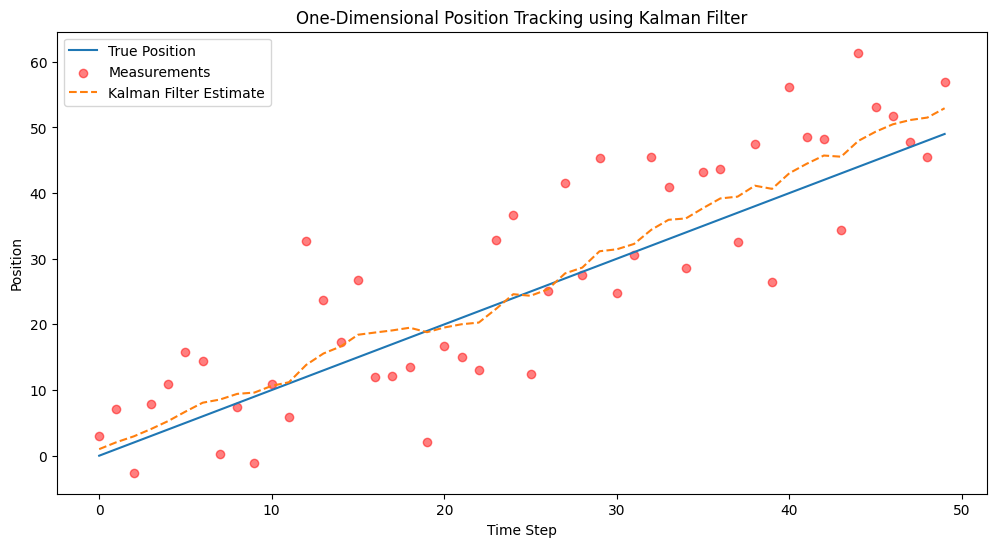

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 1.0  # Time step
num_steps = 50  # Number of time steps
true_velocity = 1.0  # Constant velocity

# Generate true positions
x_true = np.arange(0, num_steps * dt, dt) * true_velocity

# Generate noisy measurements
measurement_noise_std = 10.0
z_measurements = x_true + np.random.normal(0, measurement_noise_std, size=num_steps)

# Kalman filter initialization
x_est = np.zeros(num_steps)  # Estimated position
P = np.zeros(num_steps)      # Estimate uncertainty
x_est[0] = 1.0               # Initial position estimate
P[0] = 0.1                   # Initial estimate uncertainty

# Define noise covariances
Q = 1  # Process noise covariance
R = measurement_noise_std ** 2  # Measurement noise covariance

# Kalman filter loop
for k in range(1, num_steps):
    
    # Predict step
    x_pred = x_est[k-1] + true_velocity * dt
    P_pred = P[k-1] + Q

    # Update step
    K = P_pred / (P_pred + R)
    x_est[k] = x_pred + K * (z_measurements[k] - x_pred)
    P[k] = (1 - K) * P_pred

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x_true, label='True Position')
plt.scatter(range(num_steps), z_measurements, color='red', label='Measurements', alpha=0.5)
plt.plot(x_est, label='Kalman Filter Estimate', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('One-Dimensional Position Tracking using Kalman Filter')
plt.legend()
plt.show()

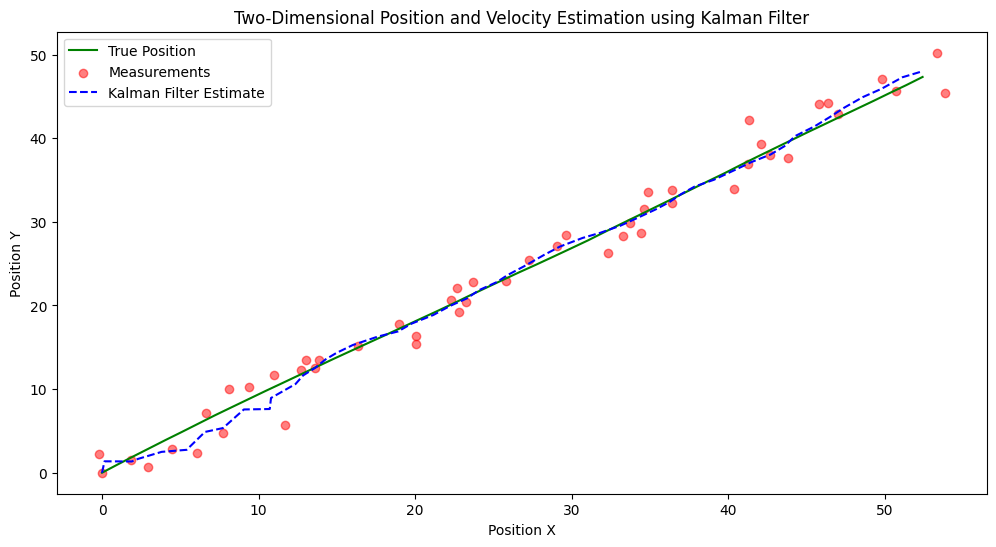

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 1.0  # Time step
num_steps = 50  # Number of time steps

# True initial state [x, vx, y, vy]
x_true = np.zeros((4, num_steps))
x_true[:, 0] = [0, 1, 0, 1]  # Initial position and velocity

# State transition matrix
F = np.array([
    [1, dt, 0,  0], # x(k+1)=x(k)+vx(k)*dt
    [0,  1, 0,  0], # vx(k+1)=vx(k)
    [0,  0, 1, dt],# y(k+1)=y(k_)+vy(k)*dt
    [0,  0, 0,  1]  # vy(k+1)=vy(k)
])
# X(k+1) = F*X(k)
# Observation matrix
H = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

# Process and measurement noise covariances
Q = np.eye(4) * 0.0001  # Small process noise
R = np.eye(2) * 2.0     # Measurement noise

# Generate true positions and measurements
z_measurements = np.zeros((2, num_steps))
for k in range(1, num_steps):
    # True state update
    x_true[:, k] = F @ x_true[:, k-1] + np.random.multivariate_normal(np.zeros(4), Q)
    # Measurements
    z_measurements[:, k] = H @ x_true[:, k] + np.random.multivariate_normal(np.zeros(2), R)

# Kalman filter initialization
x_est = np.zeros((4, num_steps))  # State estimates
P = np.zeros((4, 4, num_steps))   # Estimate covariances
x_est[:, 0] = [0, 0.5, 0, 0.5]    # Initial state estimate
P[:, :, 0] = np.eye(4)            # Initial covariance estimate

# Kalman filter loop
for k in range(1, num_steps):
    # Predict step
    x_pred = F @ x_est[:, k-1]
    P_pred = F @ P[:, :, k-1] @ F.T + Q

    # Update step
    y = z_measurements[:, k] - H @ x_pred  # Measurement residual
    S = H @ P_pred @ H.T + R               # Residual covariance
    K = P_pred @ H.T @ np.linalg.inv(S)    # Kalman gain
    x_est[:, k] = x_pred + K @ y
    P[:, :, k] = (np.eye(4) - K @ H) @ P_pred

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x_true[0, :], x_true[2, :], label='True Position', color='green')
plt.scatter(z_measurements[0, :], z_measurements[1, :], color='red', label='Measurements', alpha=0.5)
plt.plot(x_est[0, :], x_est[2, :], label='Kalman Filter Estimate', linestyle='--', color='blue')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Two-Dimensional Position and Velocity Estimation using Kalman Filter')
plt.legend()
plt.show()

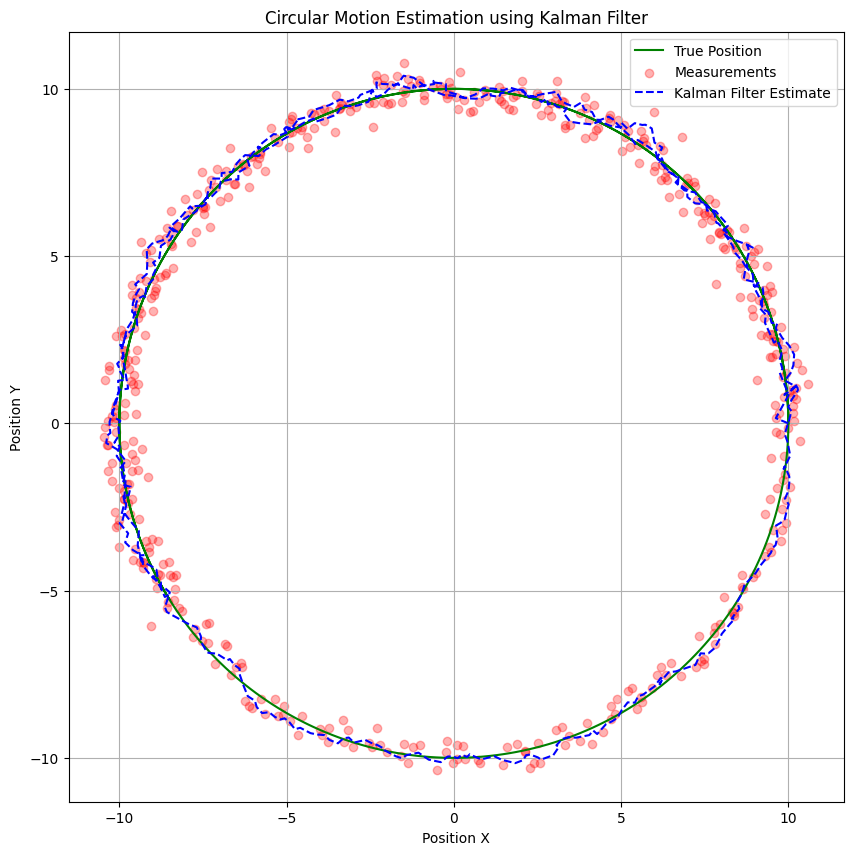

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step
num_steps = 500  # Number of time steps
t = np.arange(0, num_steps * dt, dt)

# Circular motion parameters
radius = 10  # Radius of the circle
omega = 0.2  # Angular velocity (rad/s)

# True positions and velocities
x_true = np.zeros((4, num_steps))
x_true[0, :] = radius * np.cos(omega * t)             # x position
x_true[1, :] = -radius * omega * np.sin(omega * t)    # x velocity
x_true[2, :] = radius * np.sin(omega * t)             # y position
x_true[3, :] = radius * omega * np.cos(omega * t)     # y velocity

# Measurement noise covariance
R = np.eye(2) * 0.1  # Increased measurement noise

# Measurements (with noise)
z_measurements = np.zeros((2, num_steps))
measurement_noise = np.random.multivariate_normal(np.zeros(2), R, num_steps).T
z_measurements[0, :] = x_true[0, :] + measurement_noise[0, :]
z_measurements[1, :] = x_true[2, :] + measurement_noise[1, :]

# State transition matrix (assuming constant velocity)
F = np.array([
    [1, dt, 0,  0],
    [0,  1, 0,  0],
    [0,  0, 1, dt],
    [0,  0, 0,  1]
])

# Observation matrix
H = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

# Process noise covariance
Q = np.eye(4) * 0.01  # Increased to account for model mismatch

# Kalman filter initialization
x_est = np.zeros((4, num_steps))  # State estimates
P = np.zeros((4, 4, num_steps))   # Estimate covariances
x_est[:, 0] = [radius, 0, 0, radius * omega]  # Initial state estimate
P[:, :, 0] = np.eye(4) * 500  # Initial covariance estimate (large uncertainty)

# Kalman filter loop
for k in range(1, num_steps):
    # Predict step
    x_pred = F @ x_est[:, k-1]
    P_pred = F @ P[:, :, k-1] @ F.T + Q

    # Update step
    y = z_measurements[:, k] - H @ x_pred  # Measurement residual
    S = H @ P_pred @ H.T + R               # Residual covariance
    K = P_pred @ H.T @ np.linalg.inv(S)    # Kalman gain
    x_est[:, k] = x_pred + K @ y
    P[:, :, k] = (np.eye(4) - K @ H) @ P_pred

# Plotting the results
plt.figure(figsize=(10, 10))
plt.plot(x_true[0, :], x_true[2, :], label='True Position', color='green')
plt.scatter(z_measurements[0, :], z_measurements[1, :], color='red', label='Measurements', alpha=0.3)
plt.plot(x_est[0, :], x_est[2, :], label='Kalman Filter Estimate', linestyle='--', color='blue')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Circular Motion Estimation using Kalman Filter')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()